In [ ]:
import pandas as pd
from urllib.request import Request, urlopen
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import re
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
import tensorflow as tf
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/price_df_10mins_furtherpreprocess_24hvol.csv')
df['tx_timestamp'] = pd.to_datetime(df['tx_timestamp'],unit='ns')
df = df.rename(columns = {"tx_timestamp":"timestamp","0":"volatility"})
display(df.head(3))
df.tail()
df = df.set_index('timestamp')
vol_df =df['24rolling_vol']*np.sqrt(365)

,Unnamed: 0,timestamp,first,last,mean,vol_of_vol,max,min,ret,24rolling_vol
0,0,2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,NaN,201.177211,201.177211,0.0,NaN
1,1,2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
volume_df = pd.read_csv('gdrive/My Drive/volume.csv')
volume_df['tx_timestamp'] = pd.to_datetime(volume_df['tx_timestamp'],unit='ns')
volume_df = volume_df.rename(columns = {"tx_timestamp":"timestamp","0":"volatility"})
display(volume_df.head(3))
volume_df.tail()
volume_df = volume_df.set_index('timestamp')

,timestamp,Amount1_volume,Amount0_volume
0,2020-05-26 21:00:00+00:00,21113818,104951340774642123
1,2020-05-26 21:10:00+00:00,0,0
2,2020-05-26 21:20:00+00:00,0,0


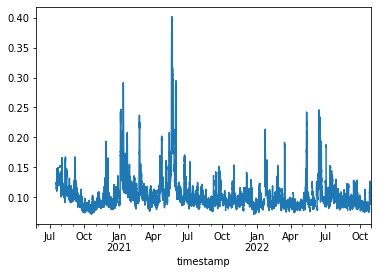

In [ ]:
vol_df.plot()

In [ ]:
vol_df.min()

0.07145312882840953

In [ ]:
vol_df = vol_df.fillna(method= 'ffill')

In [ ]:
vol_df.max()

0.4018414022471649

In [ ]:
df_price = df.iloc[:,1:-2]
df_price = df_price.drop(columns = 'vol_of_vol')

In [ ]:
df_price.head()

,first,last,mean,max,min
timestamp,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:30:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:40:00+00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final  = pd.concat([df_price,volume_df,vol_df],axis =1)


In [ ]:
df_final.head()

,first,last,mean,max,min,Amount1_volume,Amount0_volume,24rolling_vol
timestamp,,,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,21113818,104951340774642123,NaN
2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2020-05-26 21:30:00+00:00,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2020-05-26 21:40:00+00:00,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [ ]:
df = df_final
df = df.fillna(method = 'ffill')
df = df.fillna(0)

In [ ]:
df.head()

,first,last,mean,max,min,Amount1_volume,Amount0_volume,24rolling_vol
timestamp,,,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,21113818,104951340774642123,0.0
2020-05-26 21:10:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0,0,0.0
2020-05-26 21:20:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0,0,0.0
2020-05-26 21:30:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0,0,0.0
2020-05-26 21:40:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0,0,0.0


In [ ]:
df.tail()


,first,last,mean,max,min,Amount1_volume,Amount0_volume,24rolling_vol
timestamp,,,,,,,,
2022-10-30 13:50:00+00:00,1593.069968,1591.725668,1590.000000,1593.592900,1582.369607,26570925743,16749903401271139188,0.091792
2022-10-30 14:00:00+00:00,1591.752575,1579.893707,1585.600000,1591.752575,1579.893707,19714464654,12457058786247886703,0.091673
2022-10-30 14:10:00+00:00,1579.795094,1581.087842,1586.562500,1590.615992,1579.691428,12234304700,7705900002160563944,0.091597
2022-10-30 14:20:00+00:00,1581.079224,1595.250643,1590.357143,1595.250643,1581.079224,27665291683,17370766982791840106,0.092790
2022-10-30 14:30:00+00:00,1585.692455,1595.494499,1591.666667,1595.494499,1585.692455,6170372677,3875614759307931858,0.092494


In [ ]:
df['Amount1_volume'] = np.log(df['Amount1_volume'])
df['Amount1_volume'] = np.nan_to_num(np.log(df['Amount1_volume']), neginf=0)


In [ ]:
df = df.fillna(0)

In [ ]:
df[['Amount0_volume']].tail()

,Amount0_volume
timestamp,
2022-10-30 13:50:00+00:00,16749903401271139188
2022-10-30 14:00:00+00:00,12457058786247886703
2022-10-30 14:10:00+00:00,7705900002160563944
2022-10-30 14:20:00+00:00,17370766982791840106
2022-10-30 14:30:00+00:00,3875614759307931858


In [ ]:
df['Amount0_volume'] = np.log(df['Amount0_volume'].astype(float))
df['Amount0_volume'] = np.nan_to_num(np.log(df['Amount0_volume']), neginf=0)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.head()

,first,last,mean,max,min,Amount1_volume,Amount0_volume,24rolling_vol
timestamp,,,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.037876,3.66848,0.0
2020-05-26 21:10:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:20:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:30:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:40:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0


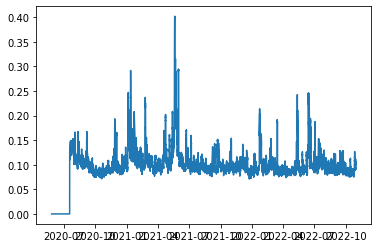

In [ ]:
plt.plot(df.index,df['24rolling_vol'])

In [ ]:
df.shape

(127690, 8)

In [ ]:
train_start = '2020-05-26'
train_end = '2022-07-31'
dev_start = '2022-08-01'
dev_end = '2022-09-30'
test_start = '2022-10-01'
test_end = '2022-10-31'

In [ ]:
df.head()

,first,last,mean,max,min,Amount1_volume,Amount0_volume,24rolling_vol
timestamp,,,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.037876,3.66848,0.0
2020-05-26 21:10:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:20:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:30:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0
2020-05-26 21:40:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.000000,0.00000,0.0


In [ ]:
train_dates = df[((df.index >= train_start) & (df.index <= train_end))].values
dev_dates = df[((df.index >= dev_start) & (df.index <= dev_end))].values
test_dates = df[((df.index >= test_start) & (df.index <= test_end))].values
train_dates.shape, dev_dates.shape, test_dates.shape

((114499, 8), (8641, 8), (4264, 8))

In [ ]:
train_y =  vol_df.fillna(method = 'ffill').fillna(0)[((vol_df.index >= train_start) & (vol_df.index <= train_end))].values
dev_y =  vol_df.fillna(method='ffill').fillna(0)[((vol_df.index >= dev_start) & (vol_df.index <= dev_end))].values
test_y =  vol_df.fillna(method='ffill').fillna(0)[((vol_df.index >= test_start) & (vol_df.index <= test_end))].values

In [ ]:
#https://www.section.io/engineering-education/univariate-time-series-using-recurrent-neural-networks/
#from sklearn.preprocessing import MinMaxScaler
# since it's the price we will scale it
scaler = MinMaxScaler()
scaler.fit(train_dates)
scaler.fit(dev_dates)
scaler.fit(test_dates)

scaled_train_dates = scaler.transform(train_dates)
scaled_dev_dates = scaler.transform(dev_dates)
scaled_test_dates = scaler.transform(test_dates)

In [ ]:
scaled_train_dates

array([[-2.30469663, -2.28314282, -2.32049242, ...,  0.1987043 ,
         0.94226777, -1.43387023],
       [-2.30469663, -2.28314282, -2.32049242, ...,  0.        ,
         0.        , -1.43387023],
       [-2.30469663, -2.28314282, -2.32049242, ...,  0.        ,
         0.        , -1.43387023],
       ...,
       [ 1.12028032,  1.10873232,  1.11368395, ...,  0.62163208,
         0.96013187,  0.40323473],
       [ 1.0968996 ,  1.11142645,  1.10620272, ...,  0.77318853,
         0.97426308,  0.36391575],
       [ 1.09991385,  1.10735899,  1.11715152, ...,  0.80609276,
         0.97752057,  0.37027985]])

In [ ]:
train_y

array([0.        , 0.        , 0.        , ..., 0.09569899, 0.09365078,
       0.0939823 ])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
days_look_back = 2
n_input = 24*6*days_look_back
n_features = 8
train_data_gen = TimeseriesGenerator(scaled_train_dates  , train_y  ,length=n_input, batch_size=64)
dev_data_gen = TimeseriesGenerator(scaled_dev_dates, dev_y,length=n_input, batch_size=64)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
early_stopping = EarlyStopping(monitor = 'loss', patience=2, min_delta=1e-4)
adam = Adam(lr=0.0001, clipnorm=1.0, clipvalue=0.5)
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=adam, loss=tf.keras.losses.MeanSquaredLogarithmicError())

num_epochs = 100

history = model.fit(train_data_gen, epochs=num_epochs, callback =[early_stopping ])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1785/1785 [==============================] - 226s 126ms/step - loss: 6.7799
Epoch 2/100
1785/1785 [==============================] - 222s 124ms/step - loss: 0.1240
Epoch 3/100
1785/1785 [==============================] - 221s 124ms/step - loss: 0.0035
Epoch 4/100
1785/1785 [==============================] - 221s 124ms/step - loss: 0.0011
Epoch 5/100
1785/1785 [==============================] - 221s 124ms/step - loss: 3.2092e-04
Epoch 6/100
1785/1785 [==============================] - 220s 123ms/step - loss: 1.0664e-04
Epoch 7/100
1785/1785 [==============================] - 222s 124ms/step - loss: 4.7805e-05
Epoch 8/100
1785/1785 [==============================] - 221s 124ms/step - loss: 3.2015e-05
Epoch 9/100
1785/1785 [==============================] - 221s 124ms/step - loss: 2.5720e-05
Epoch 10/100
1785/1785 [==============================] - 221s 124ms/step - loss: 2.3090e-05
Epoch 11/100
1785/1785 [==============================] - 221s 124ms/step - loss: 2.1146e-05
Ep

In [1]:
model.summary()

NameError: ignored

In [ ]:
model_save_name = 'lstm64_dense_pricevolvolume_24hvol_regularized data'
model.save('model_{}.h5'.format(model_save_name))

In [ ]:
#import tensorflow as tf
#from tensorflow import keras

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate_generator(dev_data_gen)
trainPredict = model.predict_generator(train_data_gen)
devPredict = model.predict_generator(dev_data_gen)
testPredict = model.predict_generator(test_data_gen)

/tmp/ipykernel_8389/2859979669.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(dev_data_gen)
/tmp/ipykernel_8389/2859979669.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_data_gen)
/tmp/ipykernel_8389/2859979669.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  devPredict = model.predict_generator(dev_data_gen)


In [ ]:
len(devPredict)

8353

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(devPredict, dev_y[24*6*days_look_back:])

0.2050520765548094

In [ ]:
mean_absolute_percentage_error(trainPredict, train_y[24*6*days_look_back:])

0.38990720335389545

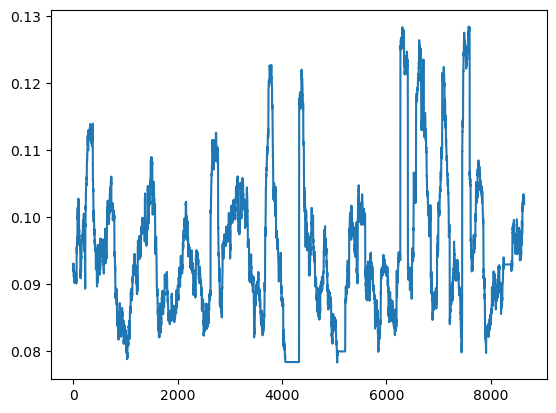

In [ ]:
plt.plot(dev_y)

In [ ]:
trainPredict

array([[-0.00549989],
       [-0.00518103],
       [-0.00486185],
       ...,
       [ 0.10958385],
       [ 0.10944387],
       [ 0.10963839]], dtype=float32)

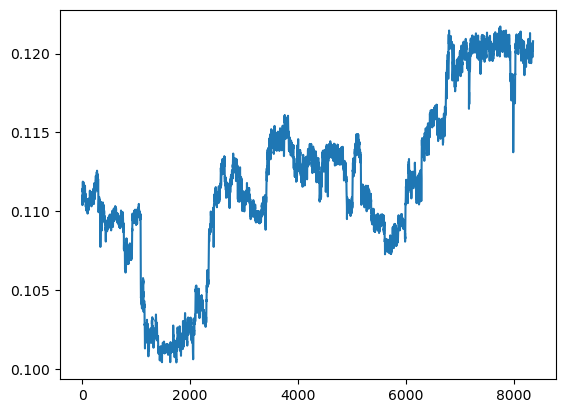

In [ ]:
plt.plot(devPredict)

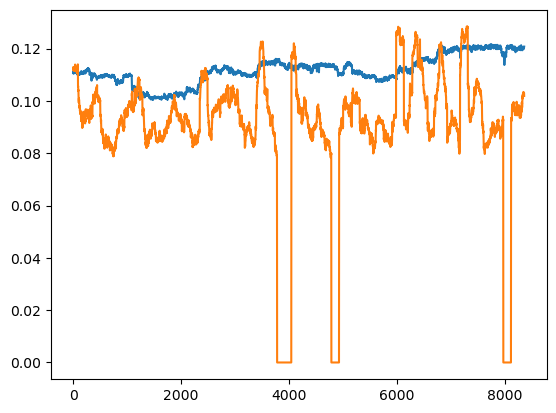

In [ ]:
plt.plot(devPredict)
plt.plot(dev_y[24*6*days_look_back:])

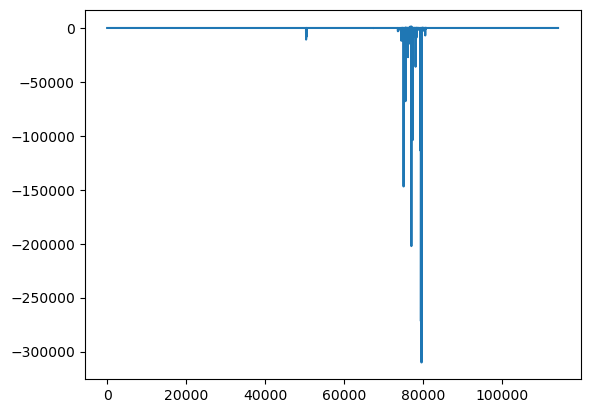

In [ ]:
plt.figure()
plt.plot(trainPredict)
#plt.plot(train_y)

In [ ]:
train_y[24*6*days_look_back:]

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.00608316],
       [0.00765859],
       [0.01053154]])

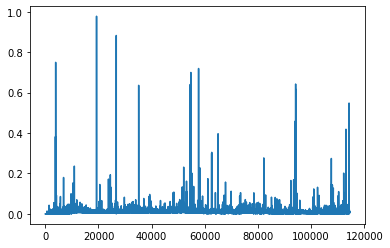

In [ ]:
plt.plot(train_y)

In [ ]:
tmp = vol_df
tmp[tmp>0.1]=np.nan

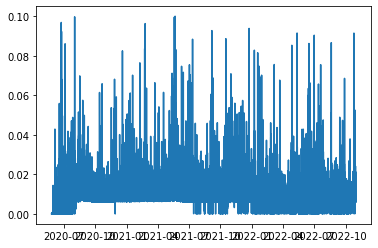

In [ ]:
plt.plot(tmp.fillna(method='ffill'))

In [ ]:
trainPredict_baseline = baseline_model.predict_generator(train_y.reshape(-1,1))
devPredict_baseline  = baseline_model.predict_generator(dev_y.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
days_look_back = 2
n_input = 24*6*days_look_back
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(trainPredict_baseline, train_y)

164.47949337333705

In [ ]:
tmp = trainPredict_baseline
tmp